In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)gl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
liver_patient = pd.read_csv("duomenys/Indian_Liver_Patient.csv")
liver_patient.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [70]:
liver_patient.shape # Duomenų lentelėje yra 583 stebėjimai ir 11 kintamųjų

(583, 11)

In [71]:
liver_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 47.9+ KB


In [72]:
#Get dummy integer values for the String Values
#df['Gender'] = pd.get_dummies(df['Gender'])['Female']
#Female=1 and Male = 0

In [73]:
liver_patient['Gender'] = liver_patient['Gender'].apply(lambda x: 1 if x =='Male' else 0)
#Female=0 and Male = 1

In [74]:
#pervadiname stulpelį dataset į liver_disease
liver_patient.rename(columns={'Dataset': 'Liver_Disease'}, inplace=True)

In [75]:
liver_patient.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [87]:
#Perkoduojame stulpelio 'Liver_Disease' reikšmes (1 reikšmes pakeičiame į 0, o 2 į 1)
#liver_patient['Liver_Disease'] = liver_patient['Liver_Disease'].apply(lambda x:0 if x =='1' else 1)
#kai perkoduojame neveikia grafikai
liver_patient[['Liver_Disease', "Age"]].groupby(["Liver_Disease"]).count() 
# Perkodavus lieka tik viena reiksme!!!!!

In [77]:
#convert Liver_Disease to a factor variable
#liver_patient["Liver_Disease"] = liver_patient["Liver_Disease"].astype("category")
#Neaisku ar reikia

In [88]:
#Let us check for the null values(suskaičiuojam nulines reikšmes stulpeliuose):
liver_patient.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_Disease                 0
dtype: int64

In [89]:
#stulpelyje 'Albumin_and_Globulin_Ratio' yra 4 praleistos reikšmės
#Let us fill these null values by imputing the mean of that column. (Tas nulines reikšmes užpildysime to stulpelio vidurkiu):
liver_patient['Albumin_and_Globulin_Ratio'].mean()
#vidurkis lygus 0.9470639032815201

0.9470154373927961

In [90]:
liver_patient=liver_patient.fillna(0.94)
liver_patient.isnull().sum() #nebeliko nulinių reikšmių

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_Disease                 0
dtype: int64

In [91]:
#Data Vizualization

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


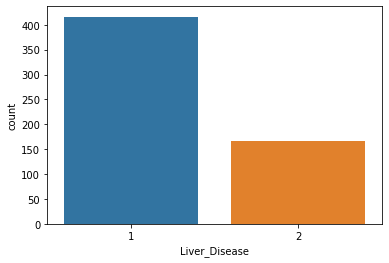

In [92]:
sns.countplot(data=liver_patient, x = 'Liver_Disease', label='Count')

LD, NLD = liver_patient['Liver_Disease'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


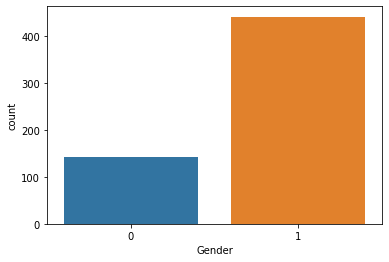

In [93]:
sns.countplot(data=liver_patient, x = 'Gender', label='Count')

M, F = liver_patient['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [97]:
liver_patient[['Gender', 'Liver_Disease', 'Age']].groupby(['Liver_Disease','Gender'], 
                                                          as_index=False).count().sort_values(by='Liver_Disease', ascending=False)

,Liver_Disease,Gender,Age
2,2,0,50
3,2,1,117
0,1,0,92
1,1,1,324


In [98]:
liver_patient[['Gender', 'Liver_Disease','Age']].groupby(['Liver_Disease','Gender'], as_index=False).mean().sort_values(by='Liver_Disease', ascending=False)

,Liver_Disease,Gender,Age
2,2,0,42.740000
3,2,1,40.598291
0,1,0,43.347826
1,1,1,46.950617


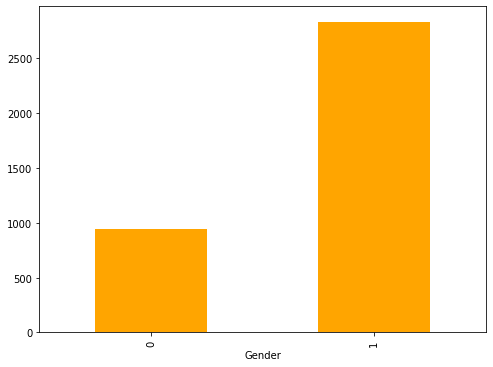

In [101]:
#Palyginkime baltymų kiekį pagal lytį.
plt.figure(figsize=(8,6))
liver_patient.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='orange')

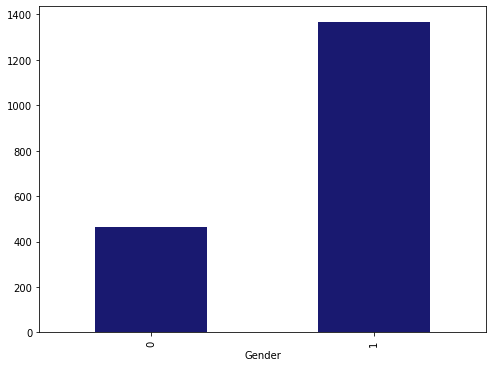

In [27]:
#Palyginame albumino lygį pagal lytį.
plt.figure(figsize=(8,6))
liver_patient.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

In [21]:
#Vyrų albuminyų lygis yra aukštesnis nei moterų.

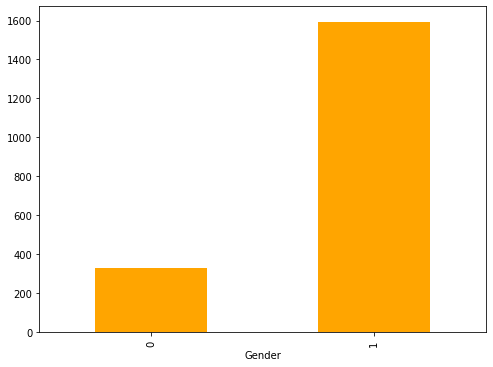

In [103]:
#Galiausiai palyginame pagal Bilirubino kiekį.
plt.figure(figsize=(8,6))
liver_patient.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='orange')

In [23]:
#Akivaizdu,kad vyrų bilirubino kiekis yra ženkliai didesnis nei moterų.
# Kitas dalykas, kurį reikia paminėti, yra tas, kad kuo didesnis bilirubino kiekis,
# tuo labiau žmogus yra linkęs sirgti kepenų ligomis.

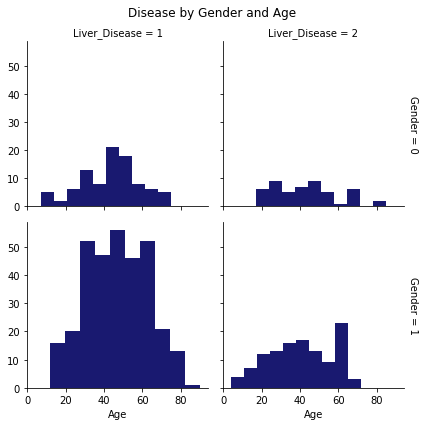

In [104]:
g = sns.FacetGrid(liver_patient, col="Liver_Disease", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="midnightblue")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

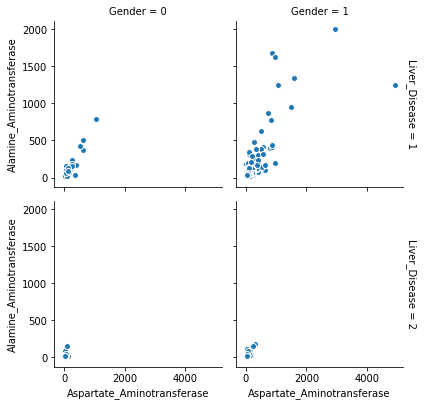

In [107]:
g = sns.FacetGrid(liver_patient, col="Gender", row="Liver_Disease", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)
# Tarp kintamųjų ........ ir ..... yra tiesinė priklausomybė, todėl galime pašalinti vieną iš jų 

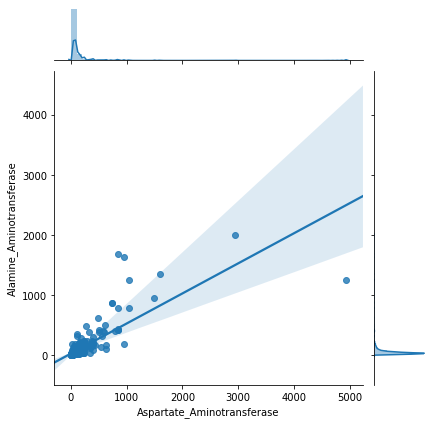

In [109]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_patient, kind="reg")

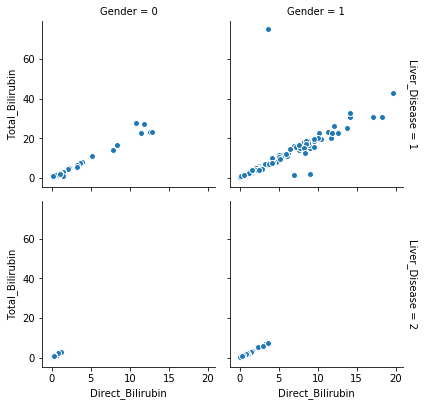

In [110]:
g = sns.FacetGrid(liver_patient, col="Gender", row="Liver_Disease", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)
# Tarp šių dviejų kintamųjų taip pat yra tiesioginė priklausomybė. 
# Tad tolimesnei analizei galime pasilikti tik vieną iš šių kintamūjų. 

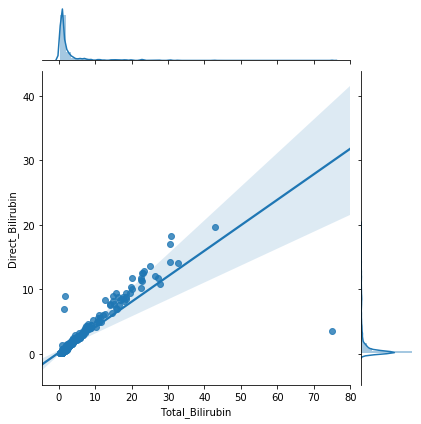

In [111]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_patient, kind="reg")

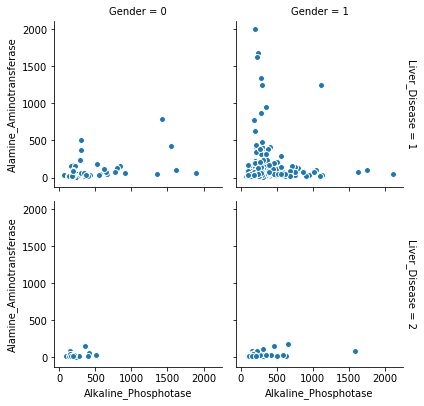

In [112]:
g = sns.FacetGrid(liver_patient, col="Gender", row="Liver_Disease", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)
#Panašu, kad priklausomybės tarp šių kintamųjų nėra. 

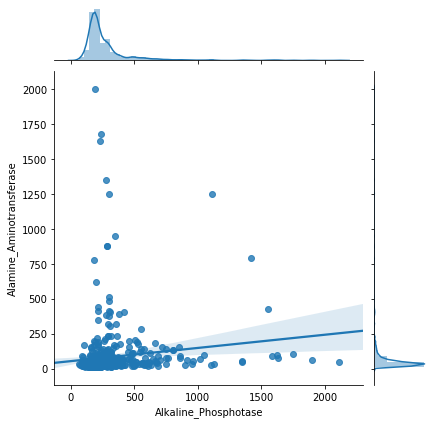

In [114]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_patient, kind="reg")
# Mūsų spėjimas pasitvirtino - priklausomybės nėra

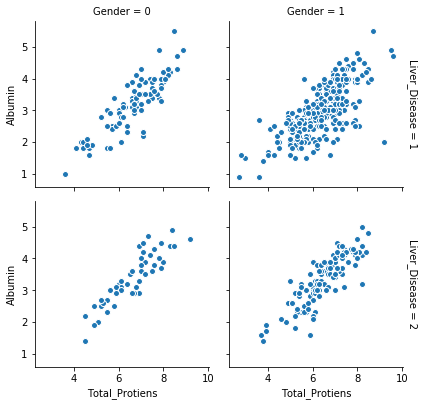

In [115]:
g = sns.FacetGrid(liver_patient, col="Gender", row="Liver_Disease", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9) 
# Yra priklausomybė

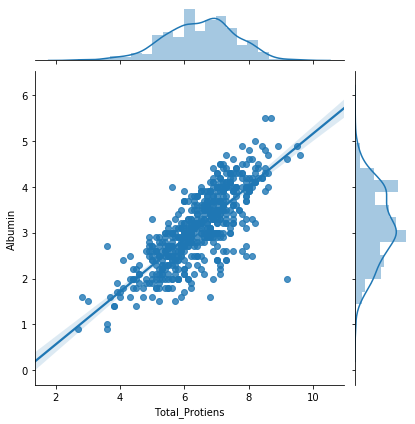

In [117]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_patient, kind="reg")

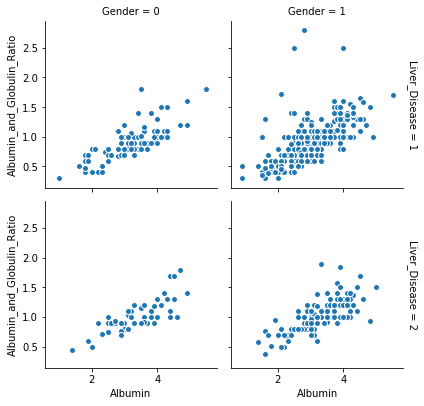

In [118]:
g = sns.FacetGrid(liver_patient, col="Gender", row="Liver_Disease", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

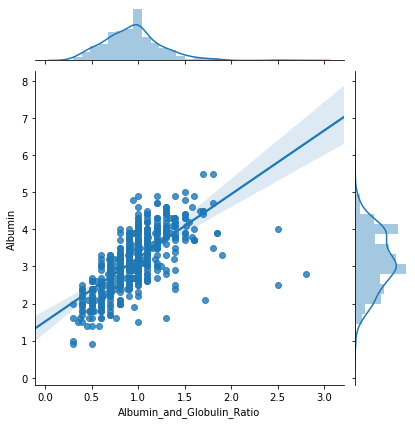

In [119]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_patient, kind="reg")

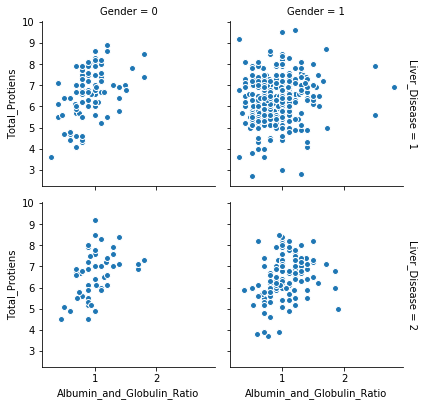

In [120]:
g = sns.FacetGrid(liver_patient, col="Gender", row="Liver_Disease", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

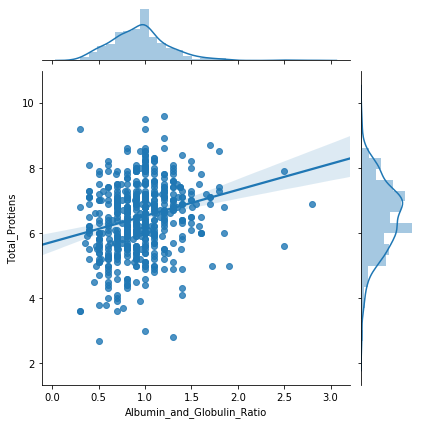

In [122]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Total_Protiens", data=liver_patient, kind="reg")

In [29]:
#Patikriname koreliacijas tarp kintamųjų, naudojantis heatmap funkcija:
corr=liver_patient.corr()

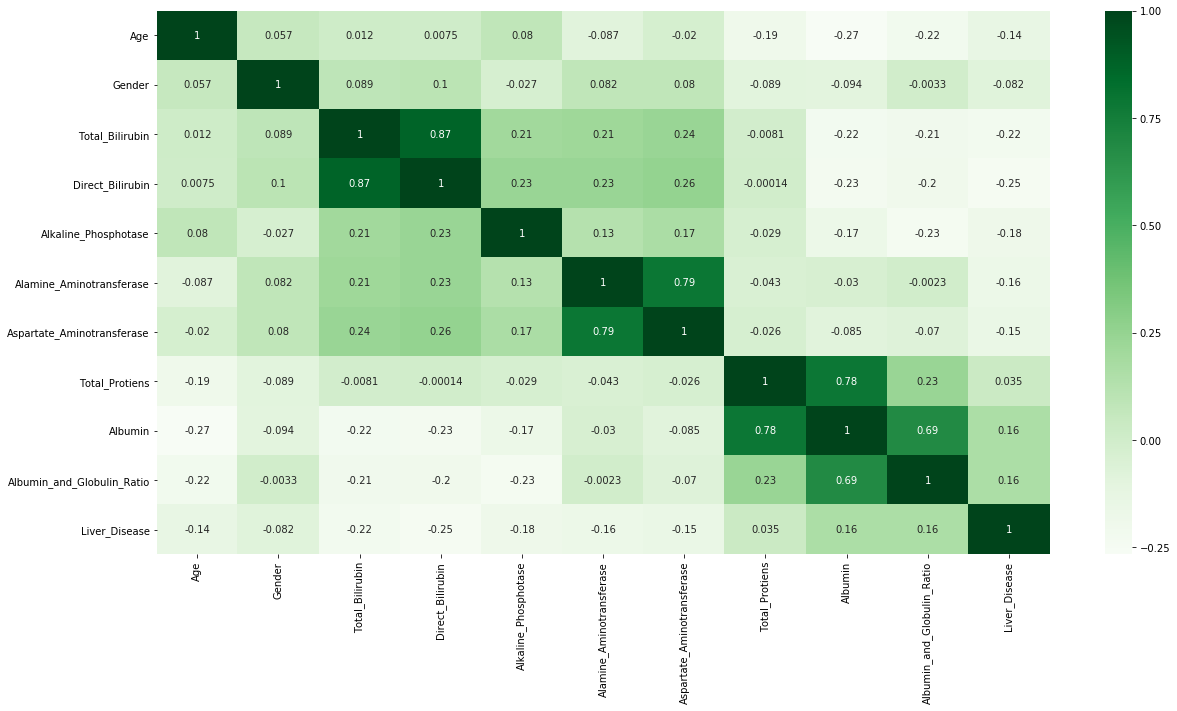

In [25]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)